## Case study - Data Analytics Team [Oluwatobilobiloba Oshinuga]

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load data
pupil_score = pd.read_excel('Pupil scores.xlsx')

pupil_attendace = pd.read_excel('Pupil attendance.xlsx')

lesson_comp = pd.read_excel('Lesson completion.xlsx')

sch_info = pd.read_excel('School_information.xlsx')

In [4]:
pupil_score.head(10)

,school_id,pupil_id,grade,subject,score
0,35175,1,Grade 1,Fluency,65.000000
1,35175,1,Grade 1,Kiswahili,0.942857
2,35175,1,Grade 1,Math,1.000000
3,40580,7,Grade 2,Math,0.933333
4,40580,7,Grade 2,Kiswahili,0.942857
5,40580,7,Grade 2,Fluency,117.000000
6,9342,8,Grade 5,Kiswahili,0.850000
7,9342,8,Grade 5,Math,0.700000
8,9342,8,Grade 5,Fluency,144.000000
9,858450,10,Grade 5,Fluency,211.000000


In [5]:
pupil_attendace.head(10)

,school_id,pupil_id,grade,attendance_records,present_records
0,35175,1,Grade 1,91,69
1,40580,7,Grade 2,92,86
2,9342,8,Grade 5,43,39
3,858450,10,Grade 5,86,62
4,792,13,Grade 3,104,81
5,324884,14,Grade 4,90,67
6,230373,16,Grade 3,81,65
7,958934,18,Grade 4,90,80
8,359640,27,Grade 3,97,77
9,359640,34,Grade 4,85,59


In [6]:
lesson_comp.head(10)

,school_id,teacher_id,grade,lesson_completion_rate
0,416,505,Grade 1,0.568401
1,416,202,Grade 2,0.680608
2,416,124,Grade 3,0.250460
3,416,516,Grade 4,0.359155
4,416,145,Grade 5,0.396761
5,792,545,Grade 1,0.809249
6,792,201,Grade 2,0.876426
7,792,669,Grade 3,0.882136
8,792,258,Grade 4,0.798742
9,792,259,Grade 5,0.964286


In [7]:
sch_info.head(10)

,region,province,school_id,tutoring_program
0,Mombasa,Coast,136992,No
1,Kilifi,Coast,687400,Yes
2,Mombasa,Coast,609982,Yes
3,Eastern,Eastern,223941,No
4,Isiolo,Eastern,34092,No
5,Isiolo,Eastern,46684,No
6,Kilifi,Coast,323877,Yes
7,Nairobi,Nairobi,47025,No
8,Busia,Western,909600,Yes
9,Kilifi,Coast,25434,No


## Data Cleaning

In [45]:
# checking duplicates among columns in the datasets
all_columns = pd.Series(list(pupil_score) + list(pupil_attendace) + list(sch_info) + list(lesson_comp))
all_columns[all_columns.duplicated()]

5     school_id
6      pupil_id
7         grade
12    school_id
14    school_id
16        grade
dtype: object

In [10]:
# make a copy of pupil score
pupil_score_clean = pupil_score.copy()

In [8]:
pupil_score.head(10)

,school_id,pupil_id,grade,subject,score
0,35175,1,Grade 1,Fluency,65.000000
1,35175,1,Grade 1,Kiswahili,0.942857
2,35175,1,Grade 1,Math,1.000000
3,40580,7,Grade 2,Math,0.933333
4,40580,7,Grade 2,Kiswahili,0.942857
5,40580,7,Grade 2,Fluency,117.000000
6,9342,8,Grade 5,Kiswahili,0.850000
7,9342,8,Grade 5,Math,0.700000
8,9342,8,Grade 5,Fluency,144.000000
9,858450,10,Grade 5,Fluency,211.000000


In [38]:
# pivot the pupil score table using subject column
pupil_score_clean = pd.pivot_table(pupil_score, index= ['school_id', 'pupil_id', 'grade'], 
                                   values= 'score', columns= ['subject']).reset_index()

In [73]:
pupil_score_clean

subject,school_id,pupil_id,grade,Fluency,Kiswahili,Math
0,416,344,Grade 2,41.0,0.600000,0.466667
1,416,354,Grade 2,47.0,0.800000,0.633333
2,416,1430,Grade 1,20.0,0.171429,0.400000
3,416,1642,Grade 5,68.0,0.775000,0.680000
4,416,1980,Grade 1,40.0,0.457143,1.000000
...,...,...,...,...,...,...
12189,991980,25716,Grade 2,105.0,1.000000,0.761969
12190,991980,26623,Grade 4,202.0,0.738017,0.620000
12191,991980,26762,Grade 4,225.0,0.695856,0.480000
12192,991980,26901,Grade 3,256.0,0.523312,1.000000


In [44]:
# sum of missing values
pupil_score_clean.isna().sum()

subject
school_id      0
pupil_id       0
grade          0
Fluency      218
Kiswahili     93
Math         107
dtype: int64

In [70]:
# merge dataset
pupil_tables = pd.merge(pupil_score_clean, pupil_attendace, on= ['school_id', 'pupil_id'], how='left', 
                        copy=False, suffixes=('', '_remove'))

# remove the duplicate columns
pupil_tables.drop([i for i in pupil_tables.columns if 'remove' in i],
               axis=1, inplace=True)

In [79]:
pupil_tables

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records
0,416,344,Grade 2,41.0,0.600000,0.466667,85,77
1,416,354,Grade 2,47.0,0.800000,0.633333,102,90
2,416,1430,Grade 1,20.0,0.171429,0.400000,85,65
3,416,1642,Grade 5,68.0,0.775000,0.680000,86,56
4,416,1980,Grade 1,40.0,0.457143,1.000000,85,74
...,...,...,...,...,...,...,...,...
12189,991980,25716,Grade 2,105.0,1.000000,0.761969,73,61
12190,991980,26623,Grade 4,202.0,0.738017,0.620000,91,87
12191,991980,26762,Grade 4,225.0,0.695856,0.480000,91,48
12192,991980,26901,Grade 3,256.0,0.523312,1.000000,85,74


In [87]:
# final merged pupil data
pupil = pupil_tables.merge(lesson_comp, on= ['school_id', 'grade']).merge(sch_info, on='school_id').drop_duplicates()

### Step 2: Calculating KPIs 

In [154]:
pupil.head()

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program,Fluency_bin
0,416,344,Grade 2,41.0,0.600000,0.466667,85,77,202,0.680608,Kirinyaga,Central,No,0
1,416,354,Grade 2,47.0,0.800000,0.633333,102,90,202,0.680608,Kirinyaga,Central,No,0
2,416,3333,Grade 2,41.0,0.514286,0.466667,102,76,202,0.680608,Kirinyaga,Central,No,0
3,416,5690,Grade 2,36.0,0.685714,0.566667,102,96,202,0.680608,Kirinyaga,Central,No,0
4,416,5692,Grade 2,40.0,0.742857,0.633333,102,82,202,0.680608,Kirinyaga,Central,No,0


What is the network-level average Percent Pupils Present ?

Percent Pupils Present = 76.98 %

In [91]:
kpi_all = round((pupil.present_records.sum() / pupil.attendance_records.sum()) * 100, 2)
kpi_all

76.98

What is the average Percent Pupils Present for each school?

In [107]:
# groupby school_id column 
school_kpi = pupil.groupby(['school_id'])[['attendance_records', 
                                           'present_records']].sum().round(decimals=2).reset_index(inplace=True)

In [109]:
school_kpi.reset_index(inplace=True)

In [113]:
# calculate percent kpi for each school id
school_kpi['percent_kpi'] = round(((school_kpi.present_records / school_kpi.attendance_records) * 100), 2)

In [114]:
school_kpi

,school_id,attendance_records,present_records,percent_kpi
0,416,6840,5198,75.99
1,792,8750,6781,77.50
2,5502,6990,4865,69.60
3,7956,10112,7880,77.93
4,8084,15679,10710,68.31
...,...,...,...,...
106,864156,7039,4394,62.42
107,909600,6652,4989,75.00
108,958934,8893,7415,83.38
109,963352,10987,7918,72.07


What is the average Percent Pupils Present now after sorting for each school?

The average KPI is 76.83%

In [116]:
round(school_kpi.percent_kpi.mean(),2)

76.83

The interpretation of the KPI change between the two approaches?

Having observed that the difference between the average KPI for all student and the average KPI for students in each school is minimal (0.15). In this case study the result of both scenarios are similar and won't have much significance on the analysis. However, it will matter if there's a very significant difference(of 1% or more) between the average KPI for all pupils and the average KPI in each school.

### Step 3: Descriptives

Average fluency scores for each of the five grades? 

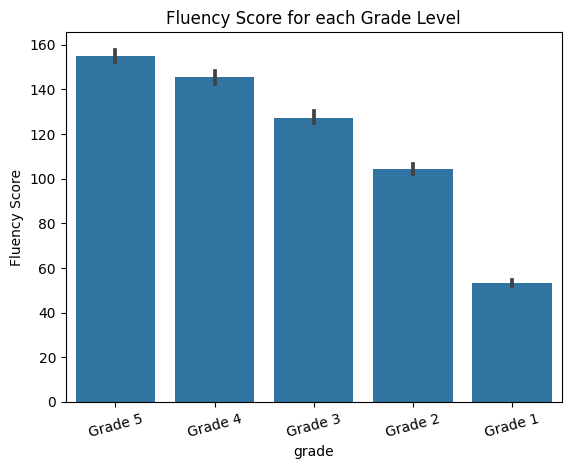

In [130]:
# plot order
order = pupil.groupby('grade')['Fluency'].mean().sort_values(ascending= False).index

# bar plot
base_color = sb.color_palette()[0]
sb.barplot(data=pupil, x='grade', y='Fluency', color=base_color, order= order)
plt.xticks(rotation=15);
plt.ylabel('Fluency Score')
plt.title('Fluency Score for each Grade Level');

Fluency score of students increase as they advance from a lower to an higher grade. Students in Grade 1 have an average fluency score of about 60 while those in Grade 5 have a fluency of about 158. The massive change implies that students in higher grade have learnt better which is a good indication. 

In [132]:
# average fluency for each region
region_score = pupil.groupby('region')['Fluency'].mean().sort_values(ascending= False)
region_score

region
Machakos         157.763636
Bungoma          144.768924
Siaya            144.533333
Tharaka nithi    144.342342
Uasin gishu      133.800000
Tana river       131.873418
Kitui            130.261682
Narok            128.510417
Kisumu           127.693023
Migori           125.102119
Embu             124.835443
Kwale            123.582133
Homa bay         122.288591
Kisii            120.587156
Kilifi           119.013605
Mombasa          117.337386
Busia            113.897059
Eastern          110.163158
Vihiga           108.674912
Nyamira          105.648649
Kakamega         105.606557
Nakuru           104.363636
Isiolo            98.442013
Trans nzoia       96.000000
Taita taveta      94.700611
Lamu              93.409836
Kajiado           92.569444
Kiambu            92.007825
Nairobi           87.923567
Bomet             68.441176
Kirinyaga         60.313953
Name: Fluency, dtype: float64

In [134]:
# highest region
region_score.where(region_score == region_score.max()).dropna()

region
Machakos    157.763636
Name: Fluency, dtype: float64

In [135]:
#lowest region
region_score.where(region_score == region_score.min()).dropna()

region
Kirinyaga    60.313953
Name: Fluency, dtype: float64

Highest region = Machakos

lowest region = Kirinyaga

 1 if a given child reads at 10 or lower, and 0 otherwise. Please create a bar chart with grades on the x-axis, and the share of pupils scoring under this threshold for each grade. 


In [139]:
# create bin for Fluency score
# 1 if a given child reads at 10 or lower, and 0 otherwise.
pupil['Fluency_bin'] = pd.cut(x= pupil['Fluency'], bins=[0, 10, pupil['Fluency'].max()], labels= [1, 0])

In [141]:
# number of unique value in fluency bin
pupil['Fluency_bin'].nunique()

2

Create a bar chart with grades on the x-axis, and the share of pupils scoring under this threshold for each grade. 

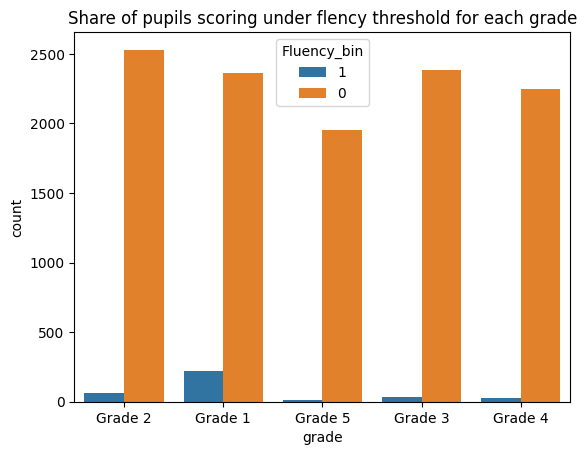

In [156]:
# countplot
sb.countplot(data=pupil, x='grade', hue='Fluency_bin')
plt.title('Share of pupils scoring under flency threshold for each grade');

There is an higher level of students with fluency score greater 10 than those with lesser accross all grades. 

What school has the highest share of pupils scoring under this threshold in grade 3?

In [176]:
# all rows in the datframe
pd.set_option('display.max_rows', None)

#filter for Grade 3
# Group data by school_id and get counts for each value in Fluency_bin
fluency_bin_count = pupil[pupil.grade == 'Grade 3'].groupby('school_id')['Fluency_bin'].value_counts().sort_values(
    ascending= False)
fluency_bin_count

school_id  Fluency_bin
581940     0              47
359640     0              45
56803      0              44
10904      0              44
239870     0              39
314160     0              37
206948     0              37
230373     0              36
32940      0              36
329344     0              34
324884     0              34
118338     0              33
47025      0              33
175100     0              32
34675      0              32
419336     0              31
592421     0              30
39078      0              30
108210     0              29
28860      0              29
792        0              29
687400     0              29
304425     0              29
264915     0              29
20972      0              28
401898     0              28
49404      0              28
323877     0              27
406350     0              26
156096     0              26
425124     0              26
991980     0              26
196896     0              26
609982     0        

school_id  581940  has the highest share of pupils scoring in category 0(score greater than 10) in grade 3

school id 46528 has the highest share of pupils scoring in category 1(score less than 10) in grade 3

### Step 4: Findings on Pupil Score

1. Student in higher grades have the highest average fluency score. The higher the grade (from grade 1 to 5) the higher the fluency score. This means students learn to speak or read better has their level or grade advances.
2. Students in Grade 1 have an average fluency score of about 60 while those in Grade 5 have a fluency of about 158. The massive change implies that students in higher grade have learnt better which is a good indication on the school's performance.
3. There is an higher level of students with fluency score greater 10 than those with lesser accross all grades, which is a good indication on student performance accross each grade.
4. school_id 581940 has the highest share of pupils scoring in category 0(fluency score greater than 10) and school id 46528 has the highest share of pupils scoring in category 1(fluency score less than 10) in grade 3